In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Preprocesamiento Básico

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [3]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

En una sola figura grafique el histograma de la edad, el histograma de la edad centrado en una media de 0 y desviación estándar de 1, y el histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1.

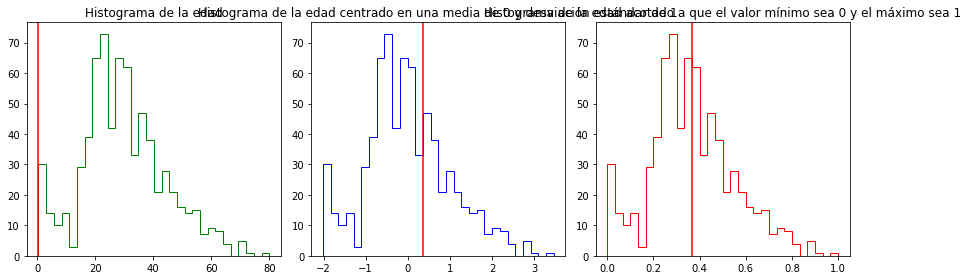

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# separamos la columna edad
edad = df['Age']

# Calcular la media y la desviación estándar de edad
media = np.mean(edad)
desviacion_estandar = np.std(edad)

# Crear una figura con tres subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
min_max = lambda x: (x-min(x))/(max(x)-min(x))
df_min_max = min_max(df['Age'])

# Histograma de la edad
axs[0].hist(edad, bins=30, color = "green", rwidth=0.9, histtype="step")
axs[0].set_title('Histograma de la edad')
axs[0].axvline(x = df_min_max.mean(), color = 'red', linestyle = '-')

# Histograma de la edad centrado en una media de 0 y desviación estándar de 1
edad_normalizada = (edad - media) / desviacion_estandar
axs[1].hist(edad_normalizada, bins=30, color = "blue", rwidth=0.9, histtype="step")
axs[1].set_title('Histograma de la edad centrado en una media de 0 y desviación estándar de 1')
axs[1].axvline(x = df_min_max.mean(), color = 'red', linestyle = '-')

# Histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1
x_min_max = (df.Age - min(df.Age))/(max(df.Age) - min(df.Age))
axs[2].hist(x_min_max, bins=30, color = "red", rwidth=0.9, histtype="step")
axs[2].set_title('Histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1')
axs[2].axvline(x = df_min_max.mean(), color = 'red', linestyle = '-')

# Ajustar los espacios entre subplots y mostrar la figura
fig.tight_layout()
plt.show()

## Asignación 2 &#x1F625;

Calcule e imprima el skewness de la tarifa. Grafique su histograma. Aplique la función de su preferencia para remover el skewness, calcule e imprima el valor del skewness para la función transformada y grafique su histograma.

In [5]:
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

media = np.mean(df["Fare"])
desEst = np.std(df["Fare"])

valorEsperado = np.mean(((df["Fare"] - media) / desEst)**3)
print(valorEsperado)

# Calcular e imprimir el skewness de la tarifa y graficar el histograma
tarifa_skew = (((df['Fare'] - df['Fare'].mean()) / df['Fare'].std())**3).mean()
print(f'Skewness de la tarifa: {tarifa_skew}')

4.779253292372355
Skewness de la tarifa: 4.771209669373592


In [6]:
# Extraer la tarifa para quitar el skewness
# Revisamos si hay valores nulos
print(f'Valores nulos: {df["Fare"].isnull().sum()}')
# Revisamos si hay valores iguales a cero
print(f'Valores iguales a cero: {(df["Fare"] == 0).sum()}')

# Cambiar los 0 por 0.01
df['Fare'] = df['Fare'].replace(0, 0.01)

Valores nulos: 0
Valores iguales a cero: 15


Skewness de la tarifa logarítmica: 2.086667787987593


Text(0.5, 1.0, 'Hist. Tarifa con raiz cuadrada')

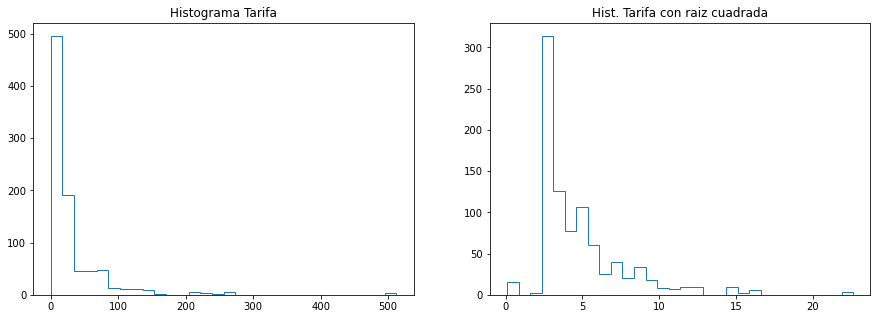

In [7]:
# Remover el skewness
tarifa_sq = np.sqrt(df['Fare'])

# Calcular el skewness de tarifa_log
tarifa_sq_skew = (((tarifa_sq - tarifa_sq.mean()) / tarifa_sq.std())**3).mean()
print(f'Skewness de la tarifa logarítmica: {tarifa_sq_skew}')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# Primer grafico, histograma de la tarifa
axs[0].hist(df['Fare'], bins=30, histtype="step")
axs[0].set_title('Histograma Tarifa')
# Segundo grafico, histograma de la tarifa logarítmica
axs[1].hist(tarifa_sq, bins=30, histtype="step")
axs[1].set_title('Hist. Tarifa con raiz cuadrada') 

## Asignación 3 &#x1F921;

Convierta la características __Sex__ y __Embarked__ a su versión de One hot encoding y agreguelas al dataframe original.

In [8]:
# Comprobación de las etiquetas en los parámetros categóricos

print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [9]:
# revisar los nulos de Embarked

totalNulos = sum(pd.isnull(df["Embarked"]))
print("total nulos: ",  totalNulos)

for i in range(len(df["Embarked"])):
    if( pd.isnull(df.Embarked[i]) == True ):
        print("posicion de nulo", i, df.Embarked[i])

total nulos:  2
posicion de nulo 61 nan
posicion de nulo 829 nan


In [10]:
# Comprobación del recuento de etiquetas en los parámetros categóricos
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# pandas.get_dummies() se utiliza para la manipulación de datos. 
#Convierte datos categóricos en variables ficticias o indicadoras.

one_hot_encoded_data = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
print(one_hot_encoded_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ... 

In [13]:
df = one_hot_encoded_data

## Asignación 4 &#x1F643;

Implemente PCA dentro de una función (usted debe definirla) y apliquela para gráficar en un scatterplot de dos dimensiones los datos. (No incluya las características __Name__, __Ticket__ y __Cabin__).

In [14]:
df_dos = df.drop(columns = ["Name", "Ticket", "Cabin"]) 
df_dos.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
df_dos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [16]:
df_dos.shape

(891, 12)

In [17]:
moda = df_dos["Age"].mode()
print(moda)

0    24.0
Name: Age, dtype: float64


In [18]:
# sustituir
df_tres = df_dos.fillna(24)

In [19]:
df_tres.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [21]:
def PCA():
    # normalizar características
    df_norm = (df_tres- df_tres.mean())
    
    # normalizar características
    df_norm = (df_tres- df_tres.mean())
    #/ df_tres.std()
    
    #calcular matriz de covarianza
    cov_matrix = np.cov(df_norm, rowvar = False)
    
    # calcular autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # ordenar autovalores y autovectores
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # elegir componentes principales
    components = eigenvectors[:, :2]
    print("La cantidad de eigenvectores son: ", len(components))
    
    # aplicar PCA
    X_pca = np.dot(df_norm, components)
    
    # crear scatterplot de dos dimensiones
    fig, ax = plt.subplots()
    ax.scatter(X_pca[:,0], X_pca[:,1])

    # agregar título y etiquetas de los ejes
    ax.set_title('PCA del Dataset')
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')

    # mostrar el gráfico
    plt.show()

La cantidad de eigenvectores son:  12


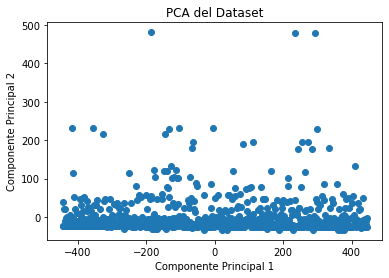

In [22]:
PCA()